This program contains code that has been used to develop an ML model that predicts car prices.

Developers: [Ume Rubab, Sardar Rehan Yasin]

In [23]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split

#reading the raw data file
df = pd.read_csv('master.csv')
df.head()

,Make,Model,Year,Engine,Seating,Price
0,Suzuki,Cultus VXR (CNG),2004,1000.0,5.0,7.0
1,Toyota,Surf SSR-G 3.4,1996,3400.0,7.0,31.0
2,Toyota,Land Cruiser 100 Series VX Limited 4.2D,1999,4200.0,7.0,55.0
3,Honda,Civic Oriel 1.8 i-VTEC CVT,2022,1800.0,5.0,59.5
4,Toyota,Prado 120 Series TZ 3.4,2005,3400.0,7.0,79.5


In [24]:
#PREPROCESSING 

#dealing with null Model values
df = df.dropna(subset=['Model'])

#dealing with null Make values
df_null = df[df['Make'].isnull() == True]
for a in df_null.index :
  index = df[df['Model'] == df_null._get_value(a, 'Model')].index
  index = index.to_list()
  if len(index) > 1:
      if index[0] != a:
          df_null._set_value(a, 'Make', df._get_value(index[0], 'Make'))
      else: 
          df_null._set_value(a, 'Make', df._get_value(index[1], 'Make'))
      
for a in df_null.index :
  df._set_value(a,'Make', df_null._get_value(a, 'Make'))
df = df.dropna(subset=['Make'])

#dealing with null Year values
df = df[df['Year'] > 1960]
df = df[df['Year'] < 2025]
df = df.dropna(subset=['Year'])

#dealing with null Engine values
df = df.dropna(subset=['Engine'])

#dealing with null Seating values
df_null = df[df['Seating'].isnull() == True]
for a in df_null.index :
  index = df[df['Model'] == df_null._get_value(a, 'Model')].index
  index = index.to_list()
  if len(index) > 1:
      if index[0] != a:
          df_null._set_value(a, 'Seating', df._get_value(index[0], 'Seating'))
      else: 
          df_null._set_value(a, 'Seating', df._get_value(index[1], 'Seating'))
      
for a in df_null.index :
  df._set_value(a,'Seating', df_null._get_value(a, 'Seating'))
df = df.dropna(subset=['Seating'])

#dealing with null Price values
df['Price']=df.groupby(['Model','Year'])['Price'].apply(lambda x:x.fillna(x.mean()))

if df['Price'].isnull().sum != 0:
  df = df.dropna(subset=['Price'])

In [25]:
df.Make.unique()

array(['Suzuki', 'Toyota', 'Honda', 'Mercedes', 'Nissan', 'Subaru',
       'Changan', 'Peugeot', 'Mitsubishi', 'BMW', 'MG', 'Chevrolet',
       'Mazda', 'JAC', 'Daihatsu', 'Prince', 'DFSK', 'KIA', 'Lexus',
       'Audi', 'Jeep', 'Hyundai', 'Daewoo', 'Proton', 'Chery', 'Haval',
       'FAW', 'United', 'Range Rover', 'BAIC', 'SsangYong', 'JW',
       'Daehan', 'Chrysler', 'MINI Cooper', 'Land Rover', 'Isuzu', 'Land',
       'Jaguar', 'Volvo', 'Volkswagen', 'Willys', 'Datsun', 'Ford',
       'Sogo', 'Hino', 'GMC', 'Porsche', 'Hummer', 'Dodge'], dtype=object)

In [26]:
#RESOLVING MAKE NAME ISSUES

df.Make = df.Make.str.lower()
def replace_name(a,b):
    df.Make.replace(a,b,inplace=True)
replace_name('land','land rover')

df.Make.unique()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array(['suzuki', 'toyota', 'honda', 'mercedes', 'nissan', 'subaru',
       'changan', 'peugeot', 'mitsubishi', 'bmw', 'mg', 'chevrolet',
       'mazda', 'jac', 'daihatsu', 'prince', 'dfsk', 'kia', 'lexus',
       'audi', 'jeep', 'hyundai', 'daewoo', 'proton', 'chery', 'haval',
       'faw', 'united', 'range rover', 'baic', 'ssangyong', 'jw',
       'daehan', 'chrysler', 'mini cooper', 'land rover', 'isuzu',
       'jaguar', 'volvo', 'volkswagen', 'willys', 'datsun', 'ford',
       'sogo', 'hino', 'gmc', 'porsche', 'hummer', 'dodge'], dtype=object)

In [27]:
#DROP DUPLICATE VALUES

df.loc[df.duplicated()]
df = df.drop_duplicates(keep='first')
df.count()


Make       9839
Model      9839
Year       9839
Engine     9839
Seating    9839
Price      9839
dtype: int64

In [28]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine', 'Seating', 'Price'], dtype='object')

In [29]:
#MULTIPLE PRICE WITH LAC

df['Price'] = 100000 * df['Price']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


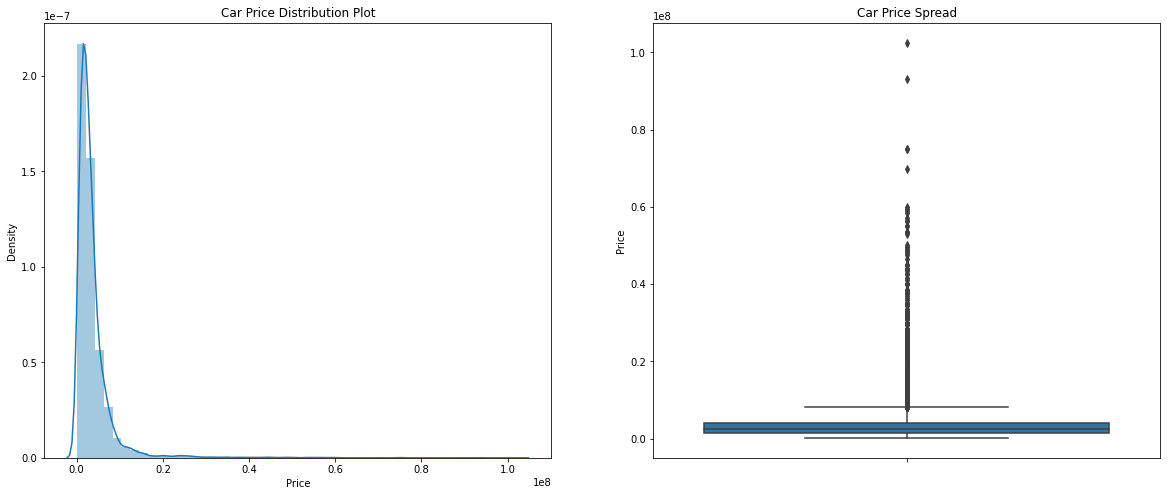

In [30]:
#Price Distribution plot 

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.Price)

plt.show()

In [31]:
#Label Encoding of Make and Model

from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()

df.Make= Encoder.fit_transform(df.Make)
df.Make.unique()

df.Model= Encoder.fit_transform(df.Model)
df.Model.unique()


array([ 521, 1159,  757, ...,   34,  189,  200])

In [32]:
# Finding correlation amongst the variables

df.corr()

,Make,Model,Year,Engine,Seating,Price
Make,1.000000,0.194677,-0.082658,-0.021064,-0.108126,-0.022850
Model,0.194677,1.000000,0.018416,0.053591,0.049362,0.084474
Year,-0.082658,0.018416,1.000000,-0.137990,-0.074244,0.285310
Engine,-0.021064,0.053591,-0.137990,1.000000,0.486714,0.582461
Seating,-0.108126,0.049362,-0.074244,0.486714,1.000000,0.307264
Price,-0.022850,0.084474,0.285310,0.582461,0.307264,1.000000


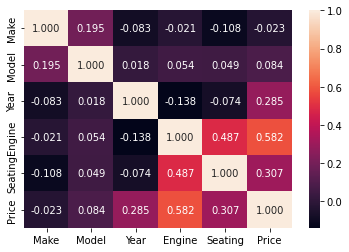

In [33]:
# plotting correlation

sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(df)

StandardScaler()

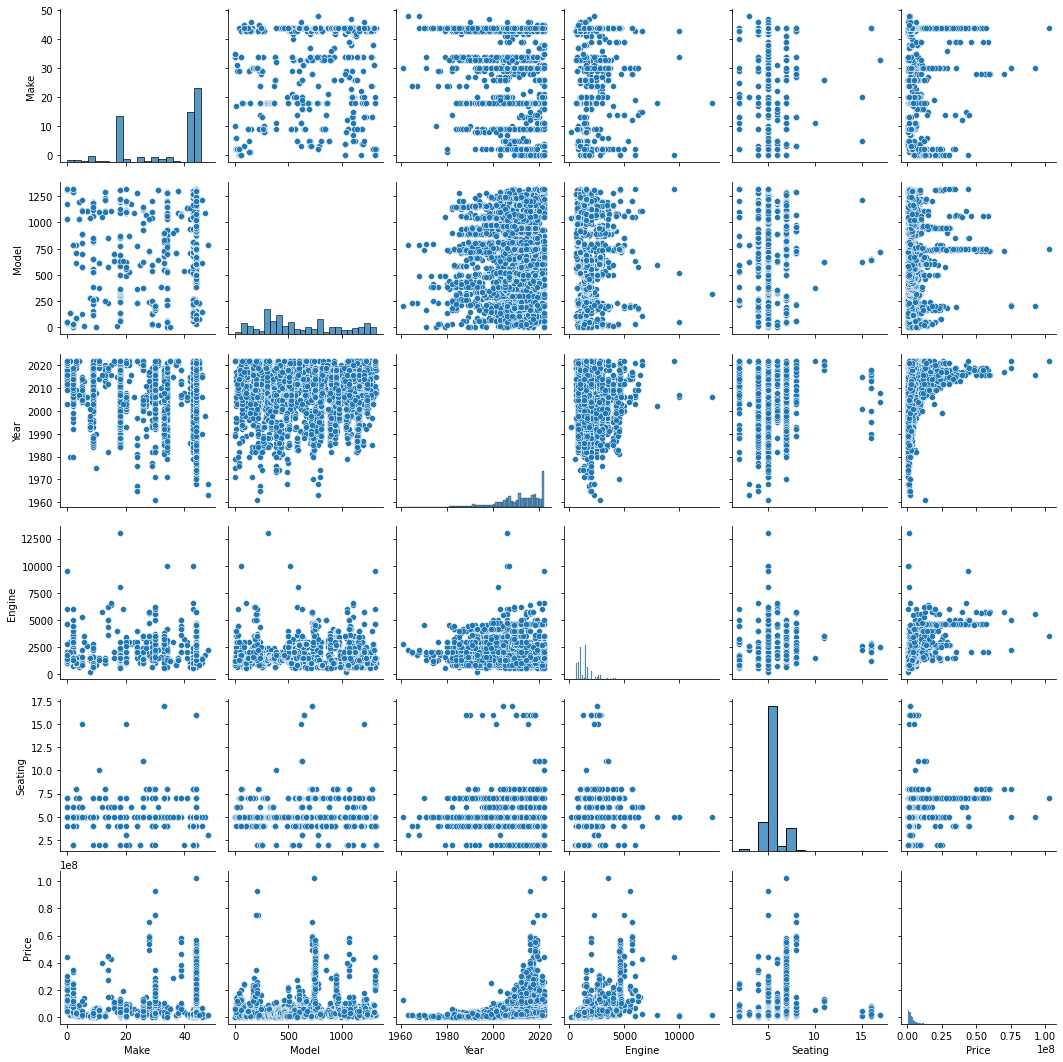

In [35]:
#PairPlots

sns.pairplot(df)
plt.show()

In [36]:
df.describe()

,Make,Model,Year,Engine,Seating,Price
count,9839.000000,9839.000000,9839.000000,9839.000000,9839.000000,9.839000e+03
mean,33.928855,618.155504,2011.352475,1540.741844,5.136701,3.617682e+06
std,12.837634,366.635277,9.150554,801.039147,1.026243,4.895146e+06
min,0.000000,0.000000,1961.000000,175.000000,2.000000,1.490000e+05
25%,18.000000,319.000000,2006.000000,1000.000000,5.000000,1.380000e+06
50%,43.000000,520.000000,2013.000000,1500.000000,5.000000,2.450000e+06
75%,44.000000,921.000000,2018.000000,1800.000000,5.000000,4.080000e+06
max,48.000000,1323.000000,2022.000000,13000.000000,17.000000,1.025000e+08


In [37]:
#dropping Make and Model columns

df=df.drop(columns={"Make"})
df=df.drop(columns={"Model"})

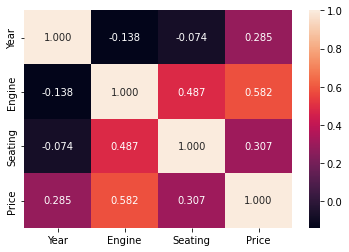

In [38]:
# making heatmap again to observe the correlation better

sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [39]:
#Sorting data chronologically

df.sort_values(['Year'], ascending=(True))

,Year,Engine,Seating,Price
12657,1961,2800.0,5.0,12500000.0
6259,1963,2200.0,3.0,1600000.0
10731,1965,1900.0,4.0,1200000.0
11756,1965,2000.0,4.0,1550000.0
260,1967,1800.0,4.0,1050000.0
...,...,...,...,...
10502,2022,660.0,4.0,2360000.0
2042,2022,2500.0,5.0,8600000.0
128,2022,1200.0,5.0,4000000.0
4143,2022,1000.0,5.0,2850000.0


In [40]:
#saving the preprocessed data from raw data into a new .csv file for future use.

df.to_csv('master_pp.csv', index='False')

In [41]:
#updating train and test sets

#indep variables
X = df.iloc[:, 0].values 
#dep variables
y = df.iloc[:,-1].values 
print('Features: ',X)
print('Label: ',y)

Features:  [2004 1996 1999 ... 2021 2009 2018]
Label:  [  700000.  3100000.  5500000. ... 13200000. 21000000. 48500000.]


Text(0.5, 1.0, 'Scatter Plot')

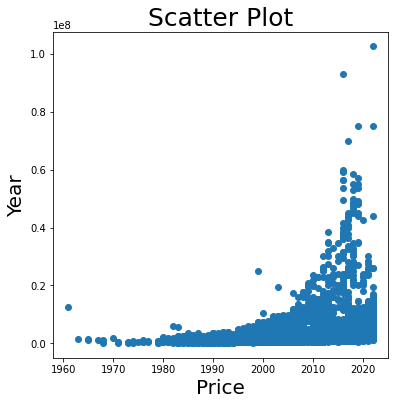

In [42]:
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(X,y)
ax.set_xlabel('Price',fontsize=20)
ax.set_ylabel('Year',fontsize=20)
ax.set_title('Scatter Plot',fontsize=25)

In [43]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Year','Engine','Seating']], df.Price, test_size = 0.2, random_state = 41)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(x_train)
# X_test = sc.transform(x_test)
# print('x-train: ',x_train)
# print('x-test: ',x_test)

In [44]:
#applying a simple LR model to check the output score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regression = LinearRegression()
model = regression.fit(x_train, y_train)
y_pred = model.predict(x_test)


# model evaluation
print("mean squared Error: ",mean_squared_error(y_test, y_pred, squared=False))
print("Mean absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 score",r2_score(y_test, y_pred))

mean squared Error:  3470843.735971739
Mean absolute Error:  1579770.095186983
R2 score 0.5050367256011318


[12759886463471.412, 8622624069034.766, 8313710356162.108, 6888928108916.845, 51150638775101.88, 244750427967920.16, 9.444015951467558e+16, 1.6093445652753715e+18, 1.0930864000213258e+19]


Text(0.5, 1.0, 'MSE VS Degree')

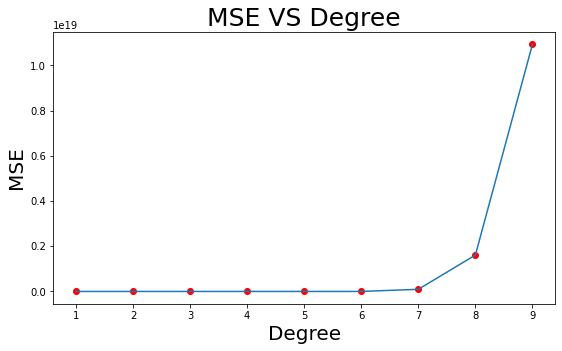

In [45]:
## Let's find out the model we need to select
maxdegree=10 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)
    lr=LinearRegression(fit_intercept=False)
    model=lr.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=7,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(9,5))
print(cross_validation_error)
ax.scatter(range(1,maxdegree),cross_validation_error, color='Red')
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)

In [46]:
#we observe from the above graph that degree = 7 will be suitable for us.
Poly_Regression = PolynomialFeatures(degree=7 )
poly_var_train = Poly_Regression.fit_transform(x_train)
poly_var_test = Poly_Regression.fit_transform(x_test)
regression = LinearRegression()
model = regression.fit(poly_var_train, y_train)
y_pred = model.predict(poly_var_test)


# model evaluation
print("mean squared Error: ",mean_squared_error(y_test, y_pred, squared=False))
print("Mean absolute Error: ",mean_absolute_error(y_test, y_pred))
print("R2 score",r2_score(y_test, y_pred))

mean squared Error:  2679837.4894556627
Mean absolute Error:  1027969.3652525062
R2 score 0.7049335917943739


Text(0.5, 1.0, 'Year vs Price')

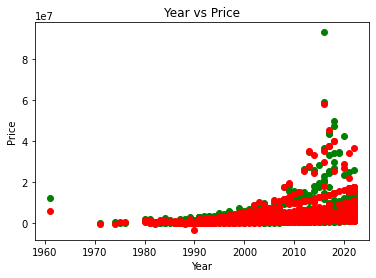

In [47]:
#scatter plot with original and predicted values for Year

plt.scatter(x_test.Year,y_test, color="green")
plt.scatter(x_test.Year,y_pred, color="red") 
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year vs Price")

Text(0.5, 1.0, 'Seating vs Price')

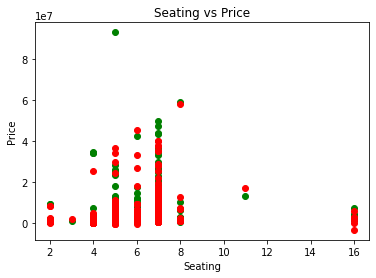

In [48]:
#scatter plot with original and predicted values for Seating 
plt.scatter(x_test.Seating,y_test, color="green")
plt.scatter(x_test.Seating,y_pred, color="red") 
plt.xlabel("Seating")
plt.ylabel("Price")
plt.title("Seating vs Price")

Text(0.5, 1.0, 'Engine vs Price')

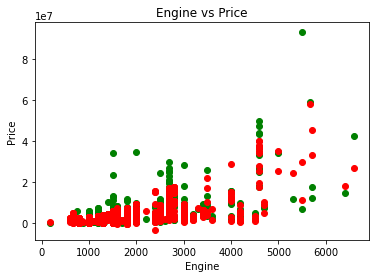

In [49]:
#scatter plot with original and predicted values for Engine

plt.scatter(x_test.Engine,y_test, color="green")
plt.scatter(x_test.Engine,y_pred, color="red") 
plt.xlabel("Engine")
plt.ylabel("Price")
plt.title("Engine vs Price")

In [50]:
#saving the model into a file
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
  pickle.dump(model, file)

In [51]:
# to load load model
# with open(pkl_filename, 'rb') as file:
# pickle_model = pickle.load(file)

In [53]:
# applied K-Fold CV method and observed its score which was lower than the used technique hence we have to drop it.
#import sklearn
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df[['Year','Engine','Seating']], df.Price, test_size = 0.2, random_state = 41)

##################################
####original k-fold
##################################

# step-1: create a cross-validation scheme
#folds = KFold(n_splits = 4, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
#hyper_params = [{'n_features_to_select': list(range(1, 14))}]

# step-3: perform grid search
# 3.1 specify model
# Poly_Regression = PolynomialFeatures(degree=7)
# poly_var_train = Poly_Regression.fit_transform(x_train)
# poly_var_test = Poly_Regression.fit_transform(x_test)
# lm = LinearRegression()
# lm.fit(poly_var_train, y_train)
# rfe = RFE(lm)             

# # 3.2 call GridSearchCV()
# model_cv = GridSearchCV(estimator = rfe, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True)      

# # fit the model
# model_cv.fit(poly_var_train, y_train)
# y_pred = model_cv.predict(poly_var_test)

# # model evaluation
# print("mean squared Error: ",mean_squared_error(y_test, y_pred, squared=False))
# print("Mean absolute Error: ",mean_absolute_error(y_test, y_pred))
# print("R2 score",r2_score(y_test, y_pred))